# Stime

Facciamo un giochino semplice, io penso ad una distribuzione e voi indovinate i suoi parametri.
Prendiamo un campione di valori:

[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

Assumendo che la distribuzione si normale, quale sara la sua media $\mu$ ?

Una scelta è quella di usare la media del campione $\overline{x}$ come una stima di $\mu$. In questo caso $\overline{x}$ è pari a 0.155 dunque è ragionevole che il parametro $\mu = 0.155$.

Questo processo è chiamato **stima**, e la statistica che abbiamo usato è chiamata **stimatore**.

Usare il campione per stimare la media è abbastanza ovvio, ed è difficile immaginare una alternativa valida.
Introduciamo però un livello ulteriore di difficoltà, introducendo del valori anomali.

Supponiamo di aver scritto male il valore di un campione, posizionando la virgola nel posto sbagliato.

[-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]

Ora quale sarà il valore della media? se usiamo il ragionamento di prima otteniamo il valore -35.12, è questo il meglio che possiamo fare? Esistono alternative?

Una opzione è identificare e togliere i valori anomali e solo poi calcolare la media, un'altra opzione è usare la mediana come stimatore.

Quale sia il miglior stimatore dipende dalle circostanze e dall'obbiettivo. 

Se non ci sono outliers, la media del campione minimizza l'**errore quardatico medio** (mean squared error) MSE. 
Se ripetiamo l'operazione più volte è ogni volta calcoliamo l'errore $\overline{x} - \mu$ la media dei campioni minimizza la funzione:

$$
MSE = \frac{1}{m}\sum \left(\overline{x} - \mu\right)^2
$$

Dove $m$ è il numero di volte che ripetiamo l'operazione e non deve essere confusa con n che rappresenta la dimensione usata per calcolare $\overline{x}$

Qui sotto un esempio di funzione che simula le operazioni, da notare la funzione RMSE che calcola la radice quadrata della funzione MSE.

In [1]:
import math
import random
import numpy as np


def RMSE(estimates, actual):
    """
    Calcolo la funzione RMSE partendo dalle stime e dai valori aspettati

    estimate: sequenze di stime
    actual: valori aspettati

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def Estimate1(n=7, m=1000):
    """
    Valutiamo la RMSE la media del campione e la mediana degli estimatori
    
    n: dimensione del campione
    m: numero di iterazioni
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse mean', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

Estimate1()

Experiment 1
rmse mean 0.37638602989975756
rmse median 0.4487772482548389


La variabile `estimates` definita nella funzione `RMSE` è una lista di stime, `actual` è il valore che deve essere stimato.
Nella pratica non conosceremo mai `actual`, Se lo avessimo non dovremmo stimarlo !.

Lo scopo di questo esercizio è quello di comparare le performances dei due stimatori.

Nell' esperimento 1 abbiamo visto che lo stimatore media del campione approssima meglio di quello della mediana.
Minimizzare l'MSE è una buona cosa, ma non è sempre la strategia migliore.

Per esempio se volessimo stimare la distribuzione del vento per campire come costruire un palazzo. 
Se sovrastimiamo costruiremo un palazzo con delle strutture sovrastimate, se sottostimiamo il palazzo collasserà.
In questo caso siamo di fronte ad una funzione di costo non simmetrica, dunque minimizzare la MSE non è la scelta migliore.

Un'altro esempio, supponiamo di lanciare tre dadi a sei facce e tentare di indovinare il totale.
Se si indovina la somma si vince un premio altrimenti, non succede nulla. 

In questo caso il valore che minimizza MSE sarà 10.5 ma questo non è un valore corretto in quanto la somma dei tre dadi non sarà mai 10.5 !!.

Per questo tipo di problema dobbiamo cambiare lo stimatore e passare al **Metodo della massima verosimiglianza** in inglese 
Maximum likelihood estimation (MLE). Se scegliamo 10 o 11 avremo una percentuale di vincita pari a 1 su 8, la migliore che possiamo avere.

## Stimare la varianza

Rifacciamo lo stesso gioco di prima con la stessa distribuzione con lo stesso campione ormai familiare

[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

Quale sarà la varianza $\sigma^2$ della mia distribuzione? <br/>
La scelta più ovvia è usare la varianza del campione come uno stimatore.

$$
    S^2 = \frac{1}{n}\sum \left(x_i - \overline{x}\right)^2
$$

Per un campione abbastanza ampio, $$S^2$$ è uno stimatore adeguato. Per i campioni troppo piccoli tende ad essere troppo basso.
A causa di questa sfortunata caratteristica viene anche chiamato stimatore distorto (**biased** estimator).

Uno stimatore è **unbiased** se il totale (o la media) degli errori dopo molte iterazioni di stima è zero.

Fortunatamente c'è una soluzione abbastanza semplice per stimare correttamente $\sigma^2$

$$
    S^2_{n-1} = \frac{1}{n-1}\sum \left(x_i - \overline{x}\right)^2
$$

Una spiegazione del perchè $S^2$ sia distorto e $S^2_{n-1}$ può essere letta alla seguente pagina [wikipedia](https://en.wikipedia.org/wiki/Bias_of_an_estimator).

Il problema è che $S^2$ e $S^2_{n-1}$ possono essere usati in modo indistinto. 
Valutiamo le performances di  $S^2$ e $S^2_{n-1}$.

In [2]:
def meanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', meanError(estimates1, sigma**2))
    print('mean error unbiased', meanError(estimates2, sigma**2))
    
Estimate2()

Experiment 2
mean error biased -0.14868703287535842
mean error unbiased -0.0068015383545848036


Ripetiamo n è la dimensione del campione mentre m rappresenta il numero di volte che ripetiamo l'operazione.
Notiamo che `np.var` calcola normalmente $S^2$ se invece usiamo l'argomento `ddof=1` calcola $S^2_{n-1}$.
Il parametro `ddof` sta per delta degrees of freedom possiamo avere maggiori informazioni sulla pagina [wikipedia](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)).

La funzione `MeanError` calcola la differenza media tra le stime ed il valore reale, come si vede l'errore di $S^2$ è più grande di $S^2_{n-1}$ di circa 10 volte. 

Ora nella realtà noi avremo soltanto il valore stimato, una volta che si è scelto lo stimatore appropriato si può utilizzarlo per generare una stima, il prossimo passo è quello di caratterizzare l'incertezza della stima, questo è l'argomento del prossimo capitolo.

## Campionare le distribuzioni

Supponiamo di essere scienziati che studiano i gorilla nella foresta. Vorremmo conoscere il loro stato di salute misurando il peso delle femmine adulte. Per fare questo dovremmo prendere gli esemplari da misurare e sedarli.

Questa operazione è pericolosa, costosa ed anche dannosa per i gorilla.

Ma è importante ottenere quel dato, dunque è accettabile il rischio di misurare un campione di 9 gorilla.
Assumiamo che la popolazione che vogliamo misurare è ben conosciuta e dunque scegliamo un campione rappresentativo di femmine adulte.

Usiamo la media del campione $\overline{x}$ come stima della media del peso per la popolazione $\mu$.
Avendo pesato le 9 femmine otteniamo $\mu$ = 90Kg ed una deviazione standard del campione S = 7.5Kg.

Ma quanto siamo confidenti di questa stima? Se scegliamo solo 9 esemplari su una popolazione molto ampia potremmo essere sfortunati e scegliere i 9 gorilla più pesanti o leggeri.

Variazioni nelle stime causate dalla scelta casuale sono anche chiamate errori di campionamento, **sampling error**.

Per quantificare tale errore possiamo simulare l'errore simulando il processo con un ipotetico valore $\mu$ e $\sigma$ e vedere quanto $\overline{x}$ varia.

Siccome non conosciamo il valore attuale di $\mu$ e $\sigma$ della popolazione useremo la stima $\overline{x}$ e $S$.
Dunque la domanda a cui risponderemo è "Se il valore attuale di $\mu$ e $\sigma$ sono di 90Kg e 7.5Kg e si esegue lo stesso esperimento più volte quanto sarà la variazione della stima di $\overline{x}$ ?"

La seguente funzione risponde alla nostra domanda.

standard error 2.4564672564980405
confidence interval [85.90450969 93.95552648]


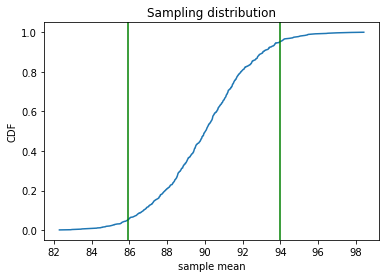

In [3]:
%matplotlib inline

from utils import calcCdf,percentile
import matplotlib.pyplot as plt

#plt.style.use('classic')

def simulateSample(mu=90, sigma=7.5, n=9, m=1000):
    """
    Mostro la distribuzione delle medie del campionamento del campione

    mu: ipotetica popolazione delle medie
    sigma: ipotetica popolazione della deviazione standard
    n: dimensione del campione
    m: numero di iterazioni
    """
    
    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    stderr = RMSE(means, mu)
    print('standard error', stderr)
    
    unique, pmf, cdf = calcCdf(means)
    ci = percentile(unique,cdf,[0.05,0.95])
    print('confidence interval', ci)
    plt.plot(unique, cdf)
    
    plt.axvline(ci[0], 0, 1,c='g')
    plt.axvline(ci[1], 0, 1,c='g')
    
    plt.ylabel("CDF")
    plt.xlabel("sample mean")
    plt.title("Sampling distribution")
    
    

simulateSample()
    

Ad ogni iterazione scegliamo `n` valori dalla distribuzione normale con i parametri impostati da noi e calcoliamo la media del campione `xbar`. Quando le `m` iterazioni sono concluse calcoliamo la distribuzione `cdf` delle stime.
Il risultato è la figura di cui sopra,questa distribuzione è anche chiamata distribuzione campionaria **sampling distribution** dello stimatore. E mostra quanto le stime varino se ripetiamo l'esperimento più volte.

La media della distribuzione campione è abbastanza vicina al valore $\mu$ il che significa che in media l'esperimento da il risultato corretto. Dopo 100 volte abbiamo ad esempio il risultato più basso pari a 85Kg e più alto di 94Kg tale range suggerice che la stima potrebbe essere sballata di 9kg.

Ci sono due vie per riassumere la distribuzione campionaria:

**Standard error** (SE) è una misura di quanto lontano in media la stima sbaglia, per ogni esperimento si calcola l'errore $\overline{x} - \mu$, nel nostro caso la funzione RMSE ha dato come risulato 2.5Kg

**Confidences interval** (CI)  intervallo di confidenza è in intervallo che include una frazione della distribuzione per esempio il 90% dell'intervallo di confidenza è il range tra il 5% e il 95% nel nostro caso da come risultato (85,94) Kg.

Lo standard error e il confidences interval sono fonte di molta confusione.

* Le persone spesso confondono lo standard error con la deviazione standard. La deviazione standard misura la variabilità della misura, mentre l'errore standard misura la variabilità delle stime. Per aiutarci ricordiamoci che all'aumentare di m cioè la dimensione del campione l'errore diminuisce mentre la deviazione standard resta uguale.

* Le persone spesso pensano che il 90% dell'intervallo di confidenza sia la probabilità che $\mu$ cada in quell'intervallo. Sfortunatamente questo non è vero. La distribuzione campionaria risponde ad una differente, ti da una idea di quanto una stima sia affidabile dicendoti quanto varierebbe la stessa in un nuovo esperimento.

E' molto importante ricordare che l'intervallo di confidenza e l'errore standard quantificano solo l'errore di campionamento, un errore dovuto alla misurazione di solo una parte della popolazione.

La distribuzione campionaria, non tiene conto di altri sorgenti di errore, in particolare del bias di campionamento e dell'errore di misura, che saranno prossimi argomenti.

## Bias di campionamento


Supponiamo che invece di misurare il peso dei gorilla nella riserva, si voglia conoscere il peso medio delle signore della città in cui si vive. E' molto improbabile che tu possa avere la possibilità di scegliere un campione rappresentativo di persone e tu le possa pesare.

Una alternativa più semplice sta nel "campionamento telefonico", si sceglie un numero casuale di persone le si chiama e le si chiede il loro peso...

Il campionamento telefonico ha ovviamente i suoi limiti. Per esempio il campione è limitato alle persone che sono nell'elenco telefonico, questo elimina le persone più povere che non hanno il telefono e quelle più ricche che non vogliono ovviamente apparire.

Un ulteriore problema lo si ha se si chiama durante il giorno, si ha meno probabilità di selezionare persone che hanno un lavoro.

Se fattori come lavoro, reddito e dimensione della famiglia sono fattori legati al peso (ed è plausibile che lo siamo) i risultati del nostro sondaggio varieranno in un modo o nell'altro.

Il problema è chiamato **sampling bias** bias di campionamento perchè è una proprietà del processo di campionamento.

Il processo di campionamento soffre anche dell'effetto di selezione (self-selection) che rappresenta un tipo di bias del campionamento. Alcune persone interpellate si rifiuteranno di rispondere e se questa tendenza nella risposta è legata al peso questo avrà delle ripercussioni sui risultati.

Punto finale, se chiediamo il peso e non pesiamo direttamete le persone, il risultato non sarà accurato. Chi risponde tenderà ad arrotondare se questo crea loro disagio. Questo rappresenta **l'errore di misura**.

## Le distribuzioni esponenziali

Riprendiamo le operazioni fatte prima questa volta su una distribuzione esponenziali:

[5.384, 4.493, 19.198, 2.790, 6.122, 12.844]

Secondo voi quale potrebbe essere il parametro $\lambda$ della distribuzione?

In generale, la media di una distribuzione esponenziale è espressa come il valore $\frac{1}{\lambda}$ dunque per ricavare il parametro si può scegliere di usare la formula:

$$L = \frac{1}{\overline{x}}$$

Sappiamo però che $\overline{x}$ non è molto robusto in presenza di valori anomali dunque ci aspettiamo che L abbia qualche problemino.

Possiamo scegliere una funzione alternativa basata sul campionamento della mediana. La mediana di una distribuzione esponenziale è descritta dalla funzione $\frac{ln(2)}{\lambda}$ dunque per ottenere L si può usare lo stimatore:

$$L_m = \frac{ln(2)}{m}$$

il parametro m rappresenta la mediana del campione.

Per testara le prestazioni degli estimatori usiamo il seguente codice: 

In [7]:
def estimate3(n=7, m=1000):
    """
    Valuto L e Lm dai campioni

    n: dimensione del campion
    m: numero di iterazioni
    """
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', meanError(means, lam))
    print('mean error Lm', meanError(medians, lam))

    
estimate3()

Experiment 3
rmse L 1.0238495340664782
rmse Lm 1.6909738541835018
mean error L 0.28849382680245916
mean error Lm 0.40334883343593364


Abbiamo lanciato l'esperimento con il parametro $\lambda = 2$, Il risultato RMSE di $L$ è pari a 1.1, 1.6 per $L_m$ non possiamo dire che $L$ minimizza l'errore medio meglio di $L_m$.

Purtroppo sembra che tutti e due gli stimatori siano affetti dal problema del bias. Infatti all'aumentare di m nessuno dei due stimatori converge verso lo 0.

Dunque possiamo dire che $\overline{x}$ è uno stimatore non distorto della media della distribuzione $\frac{1}{\lambda}$ mentre L non è uno stimatore non distorto di $\lambda$